### 광물 종류 예측

In [1]:
%autosave 0
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential      # class
from tensorflow.keras.models import load_model      # model 사용
from tensorflow.keras.layers import Dense           # 전결합
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras import regularizers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Autosave disabled


In [2]:
# 데이터 준비
df = pd.read_csv('../../../data/sonar/sonar.csv', header=None)

print(type(df))
print(df.head(5))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0

In [3]:
data = df.values
print(type(data))
print(data.shape)
print(data[0])  # 첫행 데이터

<class 'numpy.ndarray'>
(208, 61)
[0.02 0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
 0.1609 0.1582 0.2238 0.0645 0.066 0.2273 0.31 0.2999 0.5078 0.4797 0.5783
 0.5071 0.4328 0.555 0.6711 0.6415 0.7104 0.808 0.6791 0.3857 0.1307
 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744 0.051
 0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324 0.0232
 0.0027 0.0065 0.0159 0.0072 0.0167 0.018 0.0084 0.009 0.0032 'R']


In [4]:
# 데이터
# <class 'float'> --> <class 'numpy.float64'>
X = data[:, 0:60].astype(float) 
print(type(X[0][0]))
# print(X[0])
# 모든행의 class만 출력
Y_str = data[:, 60]
print(Y_str.shape)
print(Y_str)

<class 'numpy.float64'>
(208,)
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']


In [5]:
# 문자 레이블을 숫자화
# 문자열을 알파벳순으로 그룹화한후 0부터 숫자로 변환
encoder = LabelEncoder()
encoder.fit(Y_str)
# print(Y_str)
Y = encoder.transform(Y_str)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [6]:
def data1(): # 실행 유형 1
    # 데이터를 훈련과 검증으로 분할
    # 손실값: 0.4871071669317427 /정확도: 85.71428656578064 %
    seed = 0
    x_train, x_val, y_train, y_val = train_test_split(X, Y, 
                                                      test_size=0.2,
                                                      random_state=seed)
    print(y_val)
    print(y_val.shape)
    
    return x_train, x_val, y_train, y_val

In [7]:
def data2():# 실행 유형 2
    # 데이터를 훈련, 검증, 테스트로 분할
    # 손실값: 0.6341118989955812 /정확도: 80.95238208770752 %
    # train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
    # stratify=Y: R, M을 동일한 비율로 섞어서 할당.
    seed = 0
    # 90%: 분할대기, 10%: 테스트
    x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                         stratify=Y,
                                                         test_size=0.1,
                                                         random_state=seed)
    # 나머지 데이터 90%를 분할, 80%: 훈련, 20%: 검증
    x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                      stratify=y_train_all,
                                                      test_size=0.2,
                                                      random_state=seed)

    print(y_val)
    print(y_val.shape)
    return x_train, x_val, y_train, y_val, x_test, y_test

In [8]:
# 다양한 데이터의 처리를 위해 전달 받음
def train(x_train, x_val, y_train, y_val):
    model = Sequential()

    # 네트워크 구성
    # model.add(Dense(128, input_dim=60, activation='relu'))
    model.add(Dense(80, input_shape=(60, ), activation='relu',
              kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002)))
#     model.add(Dense(100, activation='relu',
#             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002))) # 입력: 128, 출력: 64 
#     model.add(Dense(60, activation='relu',
#             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002))) # 입력: 128, 출력: 64 
    model.add(Dense(30, activation='relu',
              kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002))) # 입력: 128, 출력: 64 
    model.add(Dense(1, activation='sigmoid')) # 0 ~ 1 사이의 값으로 변경
    model.compile(optimizer='adam', loss='binary_crossentropy', 
                                    metrics=['accuracy'])

    cp = ModelCheckpoint(filepath='./Sonar1.h5', monitor='val_accuracy',
                               verbose=1, save_best_only=True)
    # patience=10: overfit 발생
    es = EarlyStopping(monitor='loss', patience=6,
                               restore_best_weights=True)

    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                     epochs=1000, 
                     batch_size=5, callbacks=[cp, es])
    # epochs=300: 전체 데이터 학습 횟수
    # batch_size=1: 1건 처리후 가중치 변경
    
    return model, hist

In [9]:
def plot_show(hist):
    fig, loss_ax = plt.subplots()
    # plt.figure(figsize=(6,4)) # ERROR
    fig.set_size_inches(10, 5)  # 챠트 크기 설정

    acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

    # 왼쪽 y 축 설정
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_ylim([0.0, 3.8985]) # 값을 반영하여 변경

    # 오른쪽 y 축 설정
    acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
    acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

    # 축 레이블 설정
    loss_ax.set_xlabel('epoch')  # 학습 횟수
    loss_ax.set_ylabel('loss')   # 오차
    acc_ax.set_ylabel('accuracy') # 정확도

    loss_ax.legend(loc='upper left') # 오차 레이블 위치
    acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

    plt.show()

[1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1]
(42,)
Epoch 1/1000
 1/34 [..............................] - ETA: 17s - loss: 1.6635 - accuracy: 0.8000
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to .\Sonar1.h5
34/34 [==============================] - 1s 8ms/step - loss: 1.5739 - accuracy: 0.5843 - val_loss: 1.4635 - val_accuracy: 0.5714
Epoch 2/1000
 1/34 [..............................] - ETA: 0s - loss: 1.4177 - accuracy: 0.8000
Epoch 2: val_accuracy did not improve from 0.57143
34/34 [==============================] - 0s 2ms/step - loss: 1.3657 - accuracy: 0.6325 - val_loss: 1.2864 - val_accuracy: 0.5476
Epoch 3/1000
 1/34 [..............................] - ETA: 0s - loss: 1.2547 - accuracy: 0.8000
Epoch 3: val_accuracy improved from 0.57143 to 0.71429, saving model to .\Sonar1.h5
34/34 [==============================] - 0s 2ms/step - loss: 1.2056 - accuracy: 0.6747 - val_loss: 1.1465 - val_accuracy: 0.7143
Epoch 4/1000
31

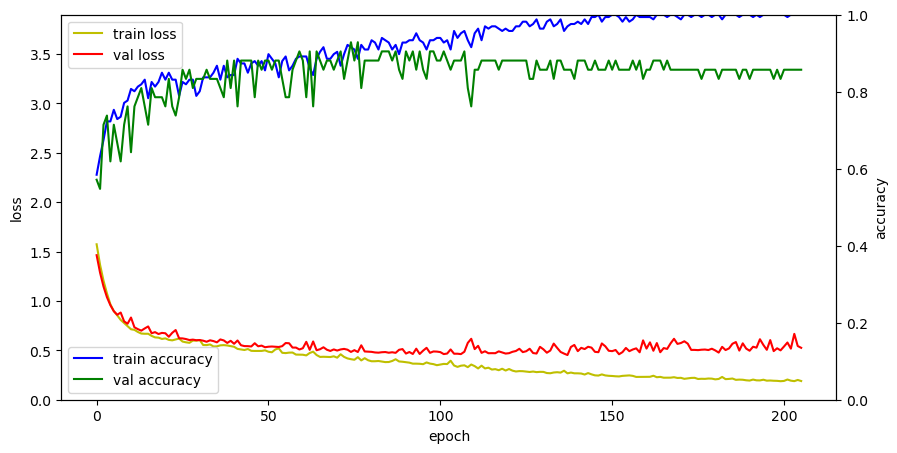

손실값: 0.49987003207206726 /정확도: 83.33333134651184 %


In [10]:
# 실행 유형 1
x_train, x_val, y_train, y_val = data1() # 데이터 준비
model, hist = train(x_train, x_val, y_train, y_val)  # 훈련
plot_show(hist)  # 시각화
test_loss, test_acc = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

[0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1
 0]
(38,)
Epoch 1/1000
30/30 [==============================] - 1s 13ms/step - loss: 1.6474 - accuracy: 0.4305 - val_loss: 1.4877 - val_accuracy: 0.5263

Epoch 00001: val_accuracy improved from -inf to 0.52632, saving model to .\Sonar1.h5
Epoch 2/1000
30/30 [==============================] - 0s 5ms/step - loss: 1.4505 - accuracy: 0.5078 - val_loss: 1.3276 - val_accuracy: 0.5263

Epoch 00002: val_accuracy did not improve from 0.52632
Epoch 3/1000
30/30 [==============================] - 0s 4ms/step - loss: 1.2723 - accuracy: 0.5843 - val_loss: 1.1988 - val_accuracy: 0.6316

Epoch 00003: val_accuracy improved from 0.52632 to 0.63158, saving model to .\Sonar1.h5
Epoch 4/1000
30/30 [==============================] - 0s 4ms/step - loss: 1.1362 - accuracy: 0.7547 - val_loss: 1.0964 - val_accuracy: 0.6053

Epoch 00004: val_accuracy did not improve from 0.63158
Epoch 5/1000
30/30 [==============================] - 0s 4m

30/30 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.8710 - val_loss: 0.7557 - val_accuracy: 0.7632

Epoch 00041: val_accuracy did not improve from 0.76316
Epoch 42/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5012 - accuracy: 0.8374 - val_loss: 0.6671 - val_accuracy: 0.7632

Epoch 00042: val_accuracy did not improve from 0.76316
Epoch 43/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4913 - accuracy: 0.8852 - val_loss: 0.6628 - val_accuracy: 0.7632

Epoch 00043: val_accuracy did not improve from 0.76316
Epoch 44/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.8931 - val_loss: 0.6617 - val_accuracy: 0.7632

Epoch 00044: val_accuracy did not improve from 0.76316
Epoch 45/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.8897 - val_loss: 0.6997 - val_accuracy: 0.7632

Epoch 00045: val_accuracy did not improve from 0.76316
Epoch 46/1000
30/30

30/30 [==============================] - 0s 4ms/step - loss: 0.4188 - accuracy: 0.8992 - val_loss: 0.6049 - val_accuracy: 0.7895

Epoch 00082: val_accuracy did not improve from 0.81579
Epoch 83/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3531 - accuracy: 0.9478 - val_loss: 0.6304 - val_accuracy: 0.8158

Epoch 00083: val_accuracy did not improve from 0.81579
Epoch 84/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3850 - accuracy: 0.9275 - val_loss: 0.6135 - val_accuracy: 0.7895

Epoch 00084: val_accuracy did not improve from 0.81579
Epoch 85/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.9483 - val_loss: 0.6366 - val_accuracy: 0.8158

Epoch 00085: val_accuracy did not improve from 0.81579
Epoch 86/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.9522 - val_loss: 0.6409 - val_accuracy: 0.7632

Epoch 00086: val_accuracy did not improve from 0.81579
Epoch 87/1000
30/30

30/30 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.9515 - val_loss: 0.6763 - val_accuracy: 0.8158

Epoch 00123: val_accuracy did not improve from 0.84211
Epoch 124/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3079 - accuracy: 0.9486 - val_loss: 0.6411 - val_accuracy: 0.8158

Epoch 00124: val_accuracy did not improve from 0.84211
Epoch 125/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.9548 - val_loss: 0.6030 - val_accuracy: 0.8158

Epoch 00125: val_accuracy did not improve from 0.84211
Epoch 126/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2659 - accuracy: 0.9624 - val_loss: 0.6135 - val_accuracy: 0.8158

Epoch 00126: val_accuracy did not improve from 0.84211
Epoch 127/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.9834 - val_loss: 0.6286 - val_accuracy: 0.8158

Epoch 00127: val_accuracy did not improve from 0.84211
Epoch 128/1000


30/30 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.9954 - val_loss: 0.6701 - val_accuracy: 0.8421

Epoch 00164: val_accuracy did not improve from 0.86842
Epoch 165/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2188 - accuracy: 0.9876 - val_loss: 0.6668 - val_accuracy: 0.8421

Epoch 00165: val_accuracy did not improve from 0.86842
Epoch 166/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2056 - accuracy: 0.9944 - val_loss: 0.6287 - val_accuracy: 0.8684

Epoch 00166: val_accuracy did not improve from 0.86842
Epoch 167/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.9821 - val_loss: 0.6388 - val_accuracy: 0.8684

Epoch 00167: val_accuracy did not improve from 0.86842
Epoch 168/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2126 - accuracy: 0.9798 - val_loss: 0.6754 - val_accuracy: 0.8421

Epoch 00168: val_accuracy did not improve from 0.86842
Epoch 169/1000


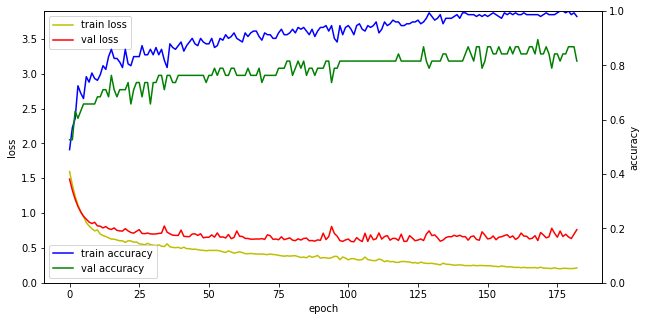

손실값: 0.6147738695144653 /정확도: 80.95238208770752 %


In [13]:
# 실행 유형 2
x_train, x_val, y_train, y_val, x_test, y_test = data2() # 데이터 준비
model, hist = train(x_train, x_val, y_train, y_val)  # 훈련
plot_show(hist)  # 시각화
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')